# Exploratory Data Analysis (EDA)

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

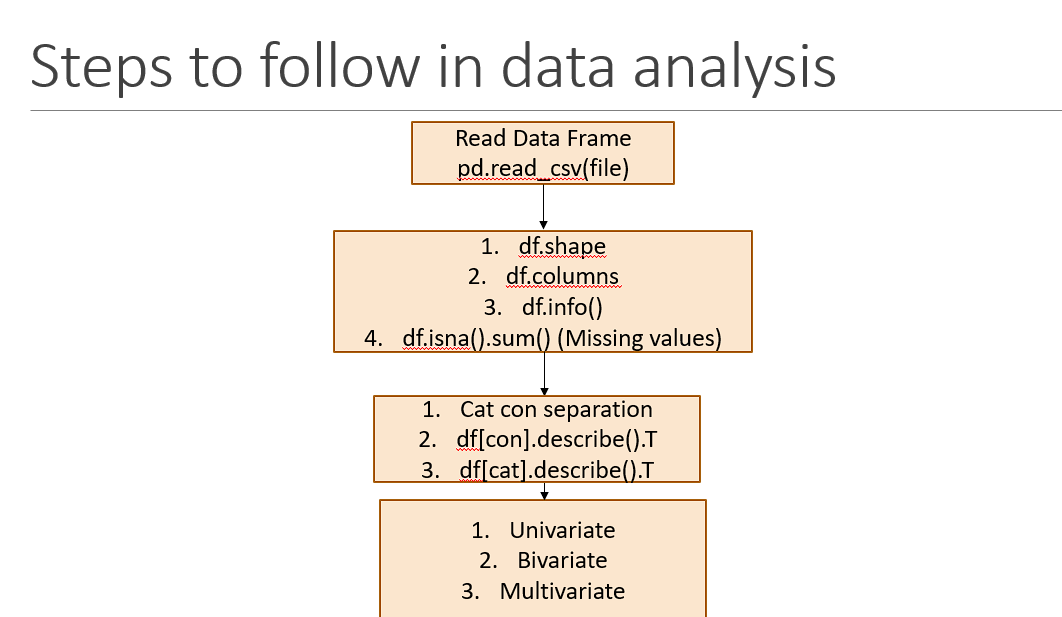

### Step 1: Read the dataframe

In [2]:
import os
os.chdir('E:/Datasets/')

In [4]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

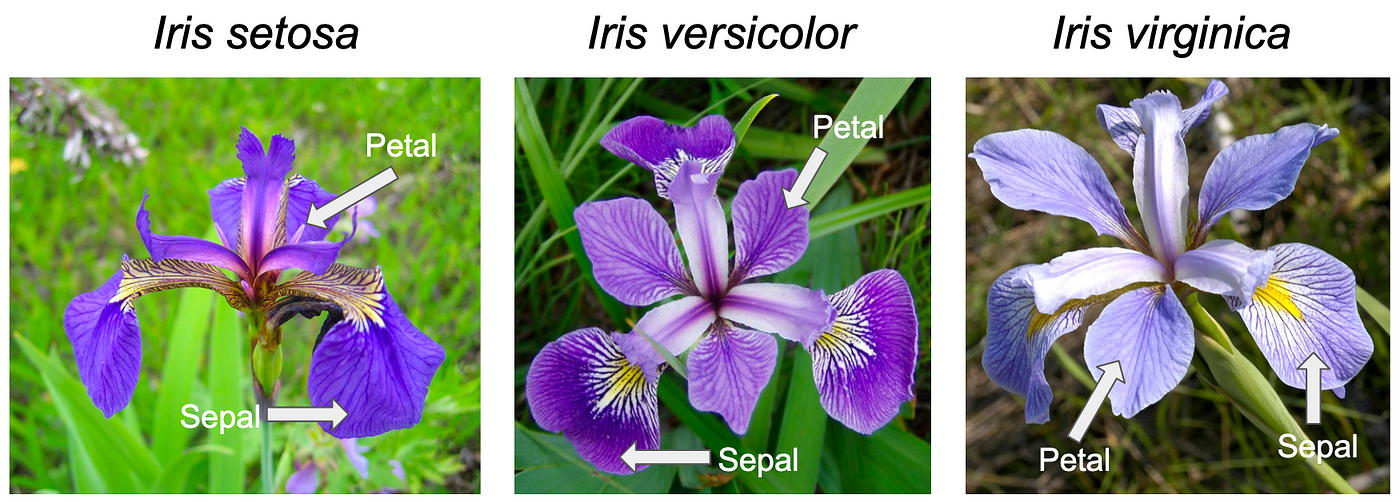

In [7]:
df.shape

(150, 5)

In [8]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Missing values in dataframe

In [9]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Duplicate values

In [10]:
df.duplicated().sum()

1

In [11]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


In [14]:
df.query("sepal_length==5.8 and sepal_width==2.7 and petal_length==5.1 and petal_width==1.9 and species=='virginica'")

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


### Step 2 : Descriptive analytics

In [15]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [16]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [18]:
cat = list(df.columns[df.dtypes=='object'])
cat

['species']

In [19]:
con = list(df.columns[df.dtypes!='object'])
con

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [21]:
df[con].describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [22]:
5.843333 + 3*0.828066

8.327531

In [23]:
5.843333 - 3*0.828066

3.359135

In [24]:
df[cat].describe().T

,count,unique,top,freq
species,150,3,setosa,50


## Step 3: Univariate analysis
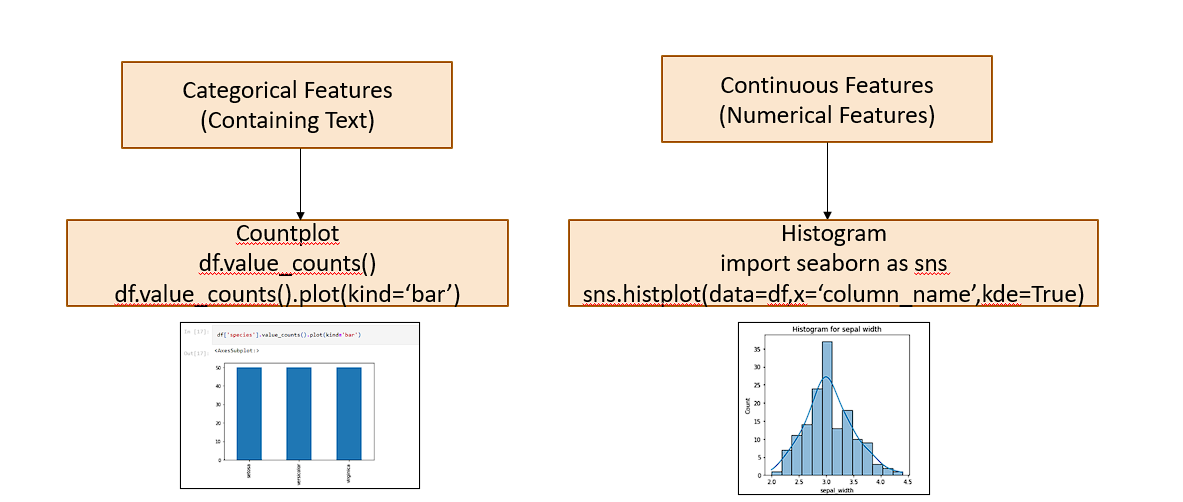

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

<AxesSubplot:title={'center':'Countplot for Species'}>

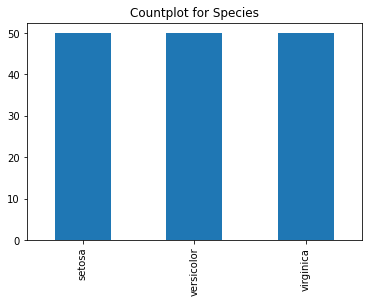

In [26]:
df['species'].value_counts().plot(kind='bar',title='Countplot for Species')

In [27]:
con

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

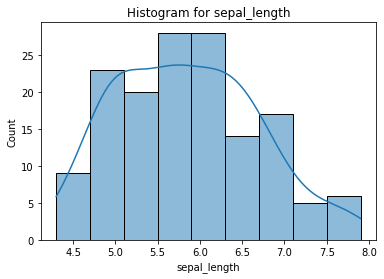

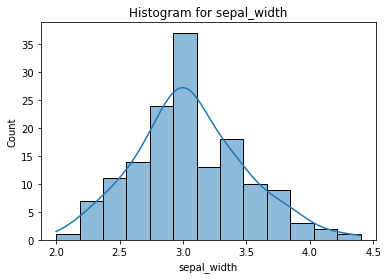

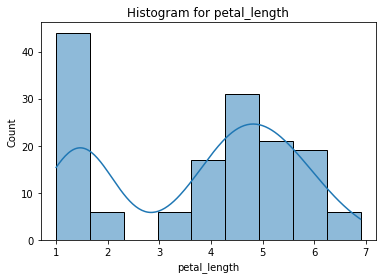

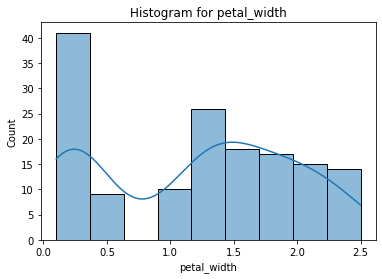

In [29]:
for i in con:
    sns.histplot(data=df, x=i, kde=True)
    plt.title(f'Histogram for {i}')
    plt.show()

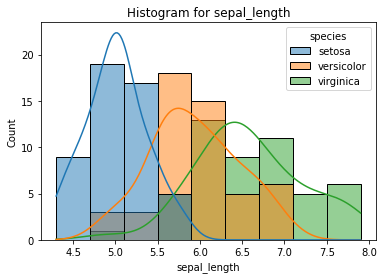

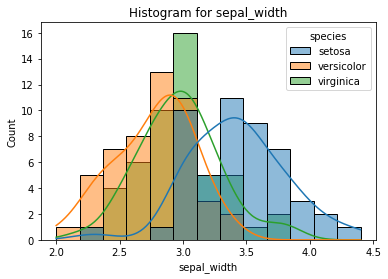

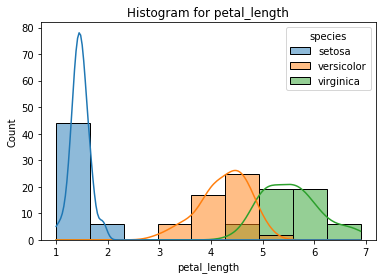

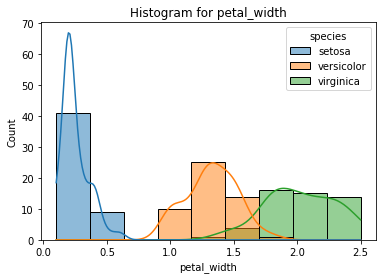

In [30]:
for i in con:
    sns.histplot(data=df, x=i, kde=True, hue='species')
    plt.title(f'Histogram for {i}')
    plt.show()

### Creating subplots

In [31]:
con

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

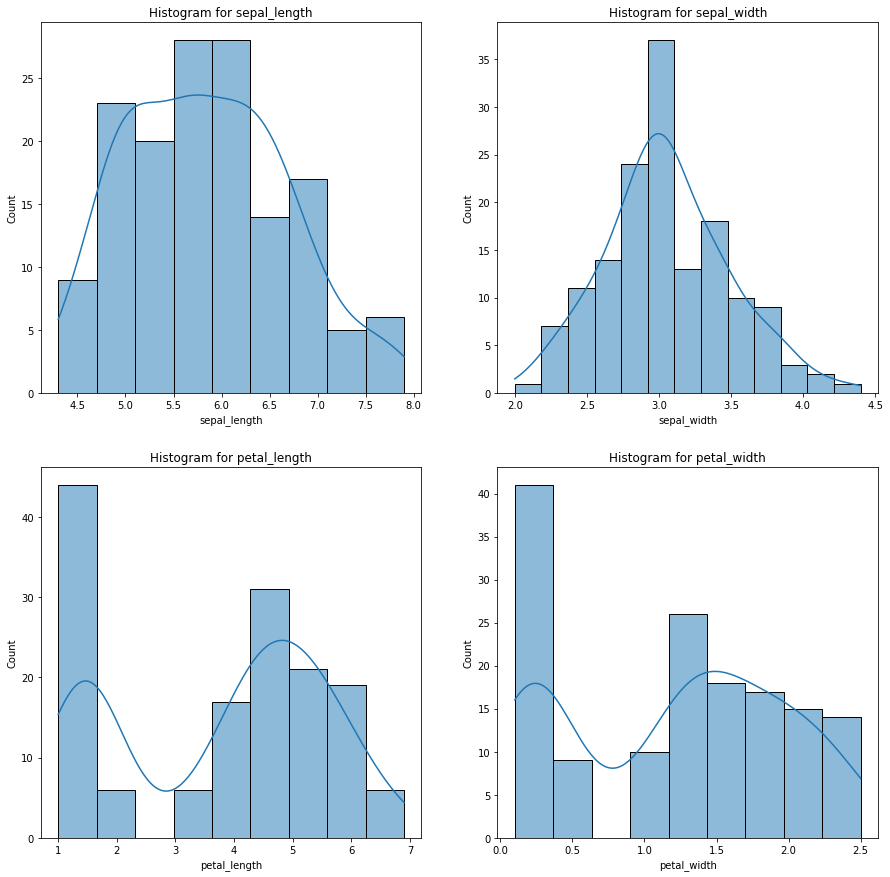

In [33]:
plt.figure(figsize=(15,15))
x = 1
for i in con:
    plt.subplot(2,2,x)
    x = x+1
    sns.histplot(data=df, x=i, kde=True)
    plt.title(f'Histogram for {i}')
plt.show()

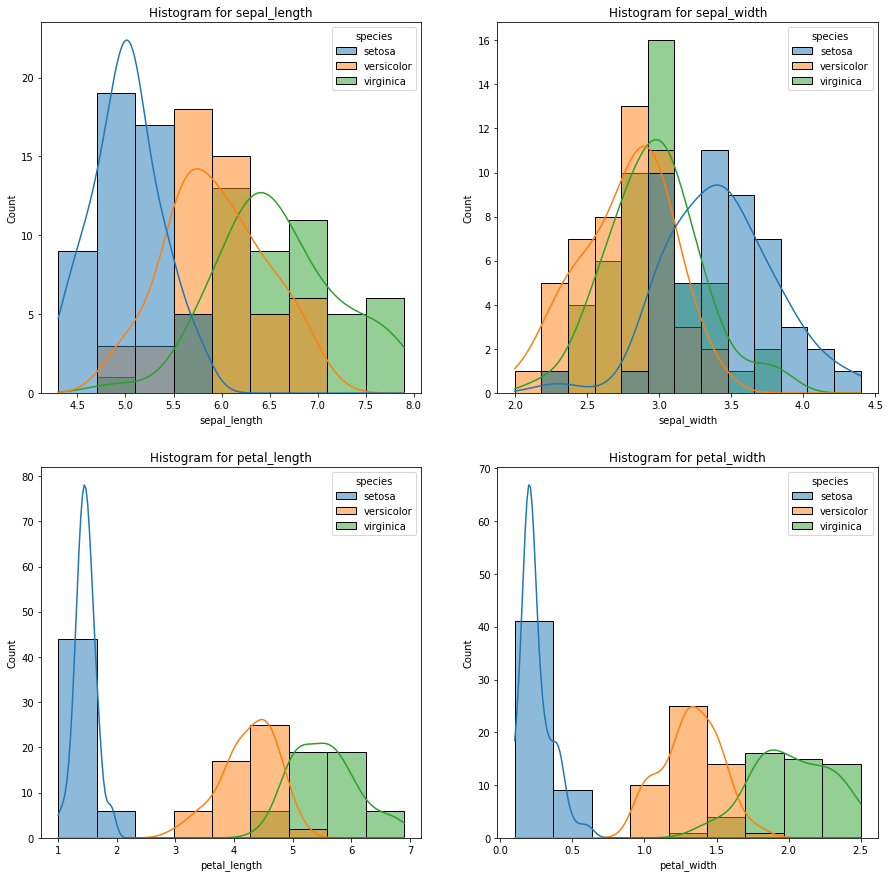

In [35]:
plt.figure(figsize=(15,15))
x = 1
for i in con:
    plt.subplot(2,2,x)
    x = x+1
    sns.histplot(data=df, x=i, kde=True, hue='species')
    plt.title(f'Histogram for {i}')
plt.show()

### Step 4: Bivariate analysis

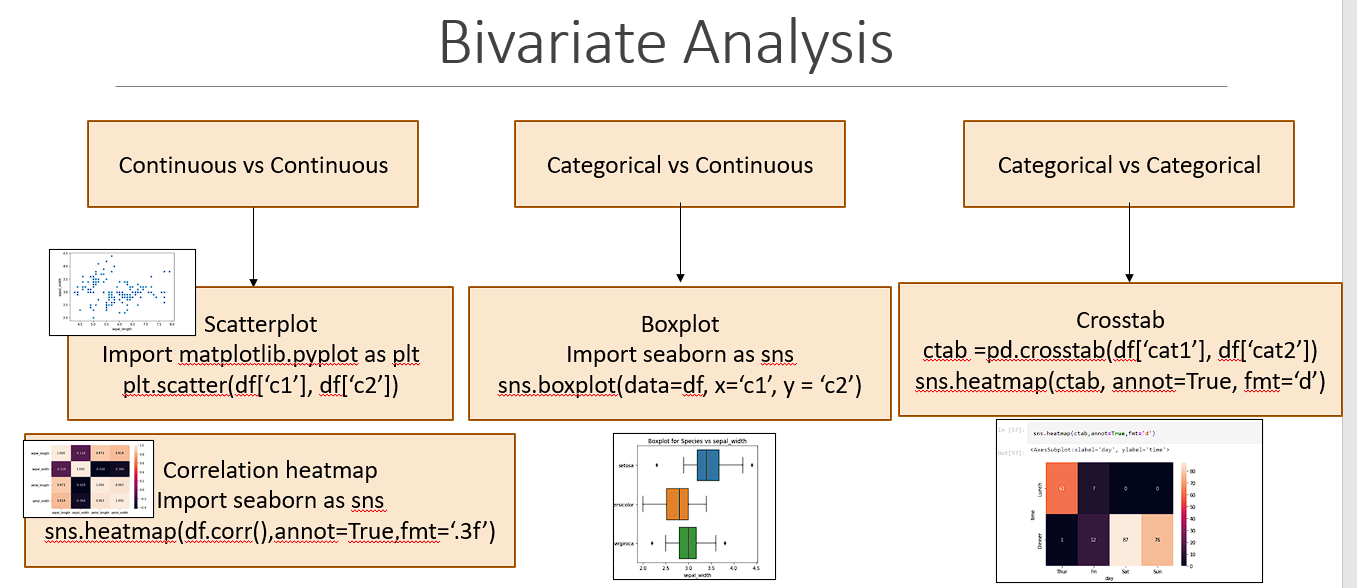

### Scatterplot

In [36]:
con

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

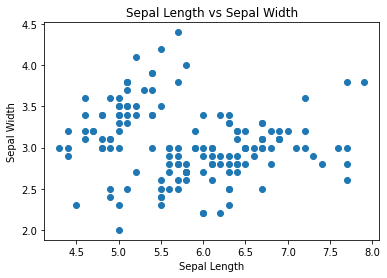

In [37]:
plt.scatter(df['sepal_length'],df['sepal_width'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width')
plt.show()

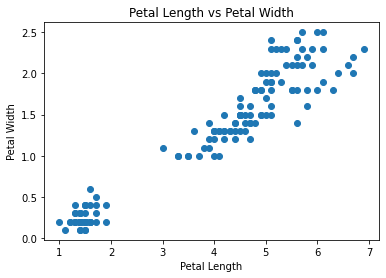

In [39]:
plt.scatter(df['petal_length'],df['petal_width'])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Petal Width')
plt.show()

### Petal length and petal width have a almost linear relationship

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

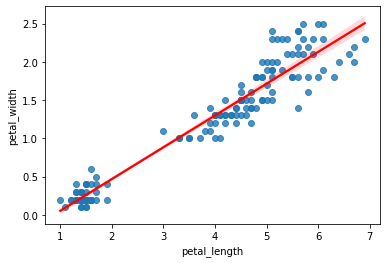

In [41]:
sns.regplot(data=df, x='petal_length', y='petal_width',line_kws={'color':'red'})

### Correlation heatmap

In [42]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

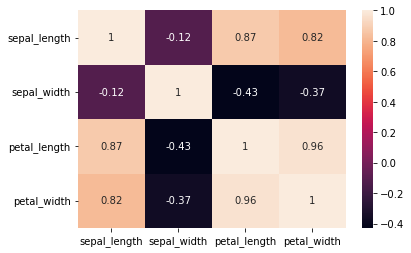

In [44]:
sns.heatmap(df.corr(),annot=True)

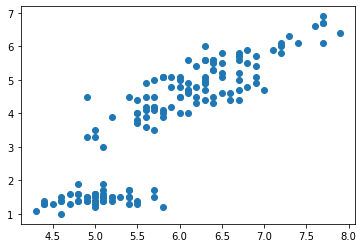

In [45]:
plt.scatter(df['sepal_length'],df['petal_length'])

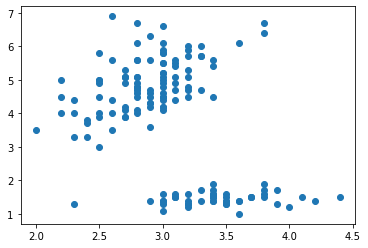

In [46]:
plt.scatter(df['sepal_width'],df['petal_length'])

### Categorical vs Continuous
Boxplot

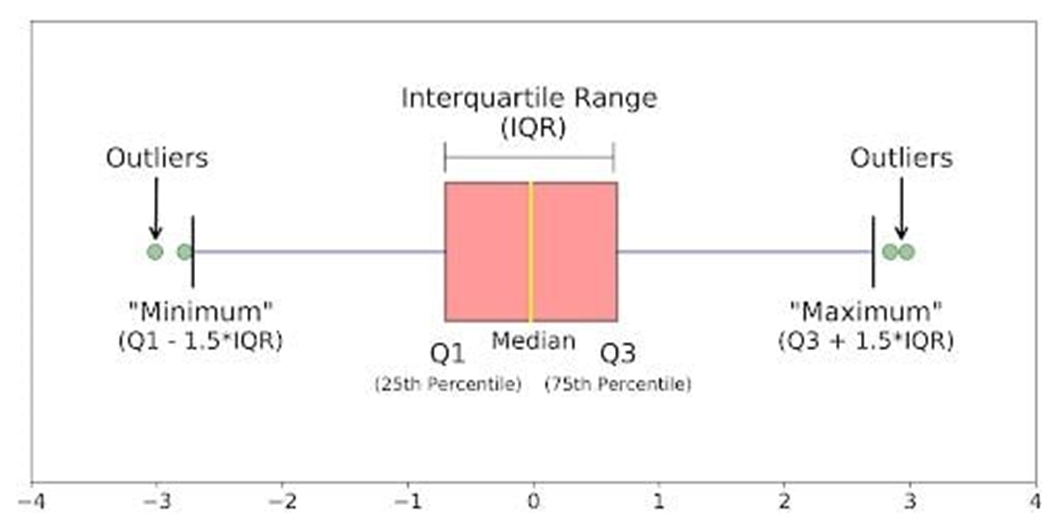

In [47]:
con

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [48]:
cat

['species']

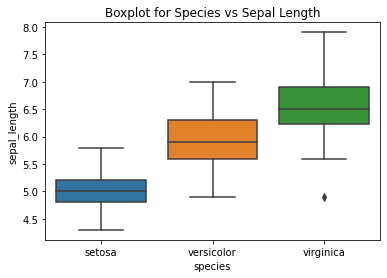

In [51]:
sns.boxplot(data=df, x='species', y='sepal_length')
plt.title('Boxplot for Species vs Sepal Length')
plt.show()

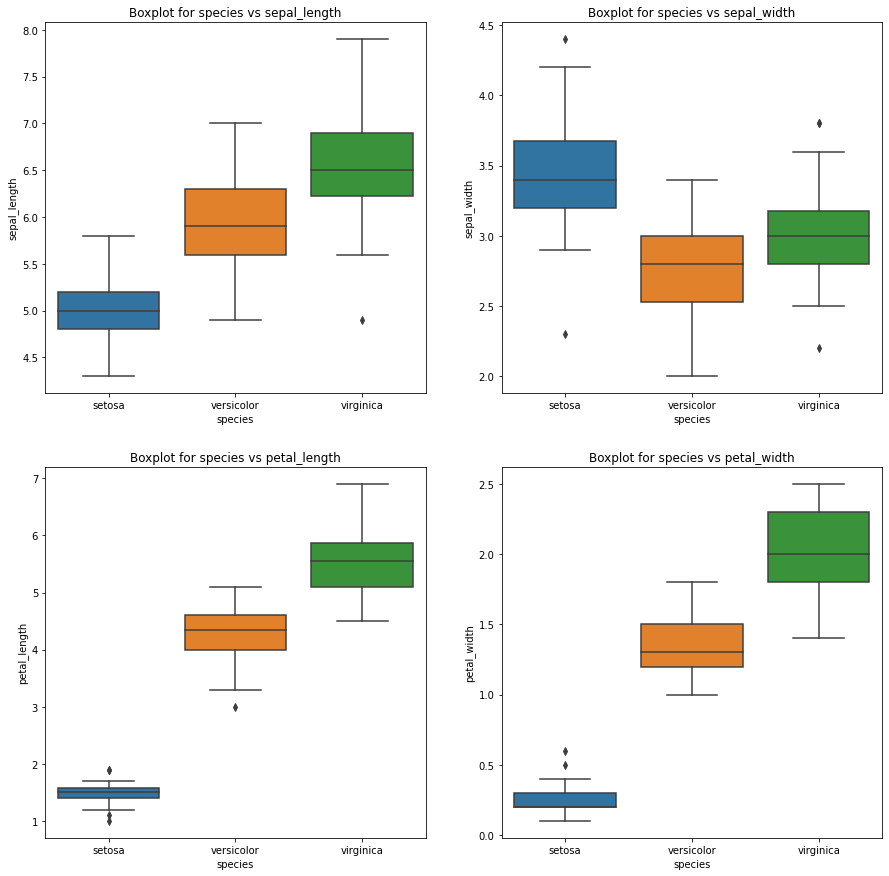

In [52]:
plt.figure(figsize=(15,15))
x = 1
for i in con:
    plt.subplot(2,2,x)
    x = x+1
    sns.boxplot(data=df, x='species', y=i)
    plt.title(f'Boxplot for species vs {i}')
plt.show()

### Step 5 : Multivariate analysis

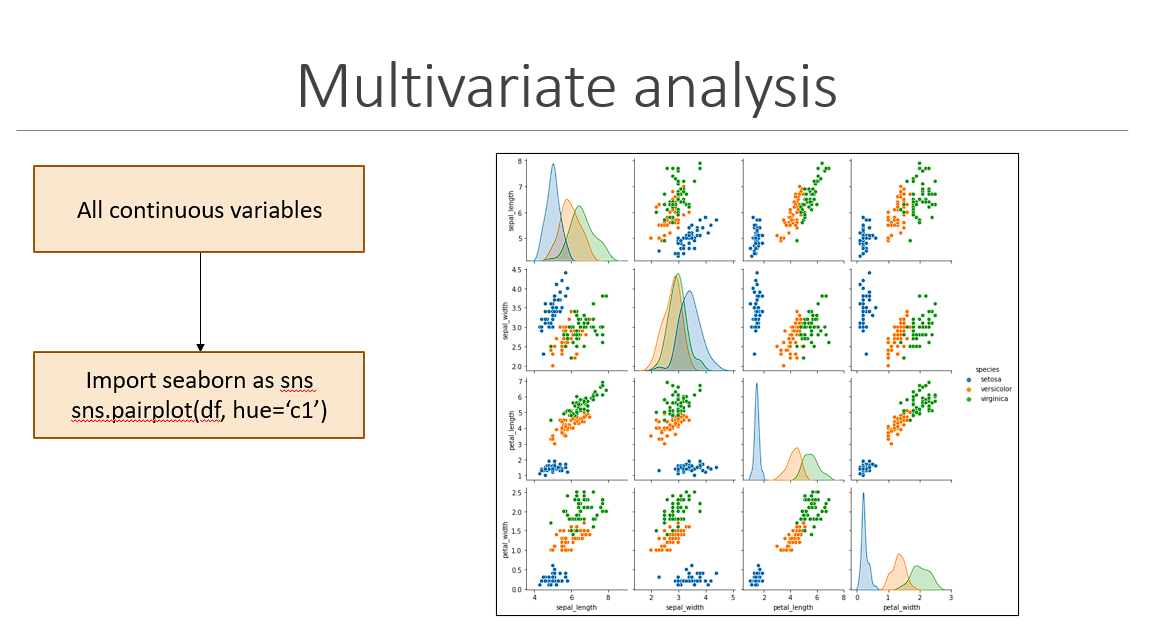

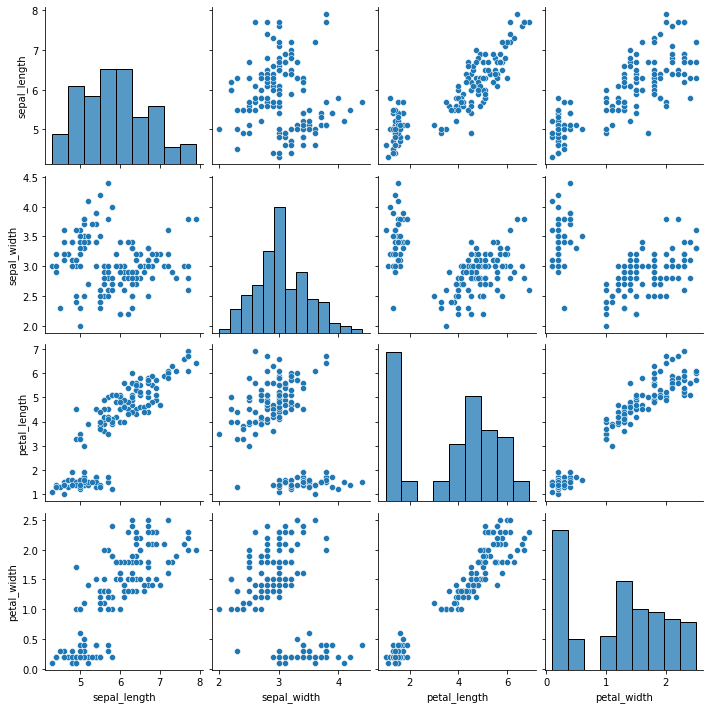

In [53]:
sns.pairplot(df)

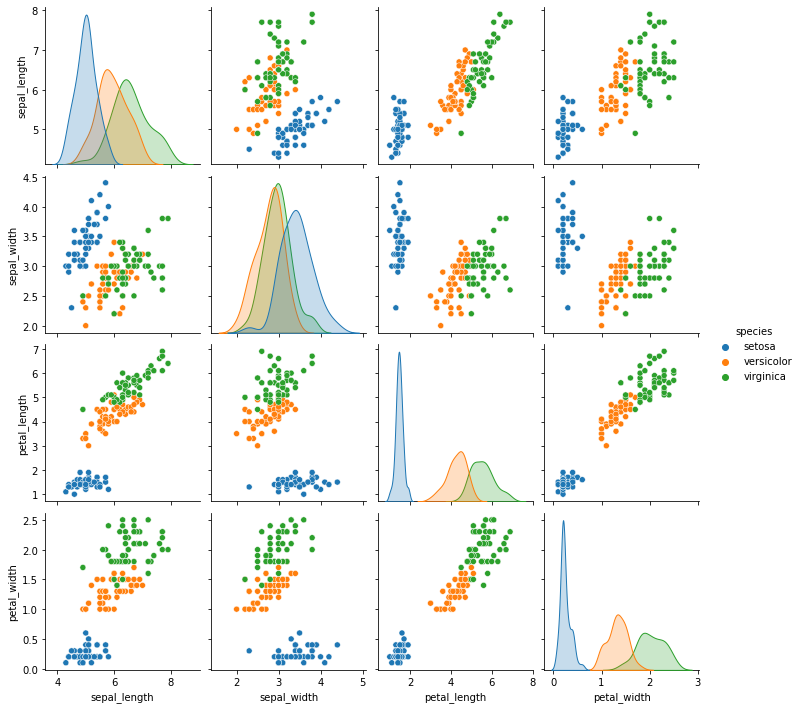

In [54]:
sns.pairplot(df,hue='species')

### Categorical vs Catgorical plot

In [55]:
df2 = pd.read_csv('tips.csv')

In [56]:
df2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


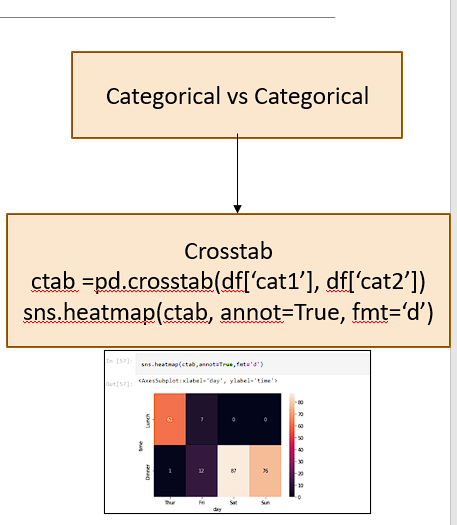

In [58]:
ctab = pd.crosstab(df2['day'],df2['time'])
ctab

time,Dinner,Lunch
day,,
Fri,12,7
Sat,87,0
Sun,76,0
Thur,1,61


<AxesSubplot:xlabel='time', ylabel='day'>

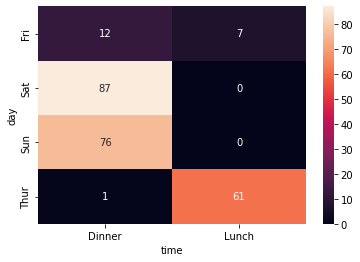

In [60]:
sns.heatmap(ctab, annot=True)

In [62]:
ctab2 = pd.crosstab(df2['sex'],df2['day'])
ctab2

day,Fri,Sat,Sun,Thur
sex,,,,
Female,9,28,18,32
Male,10,59,58,30


<AxesSubplot:xlabel='day', ylabel='sex'>

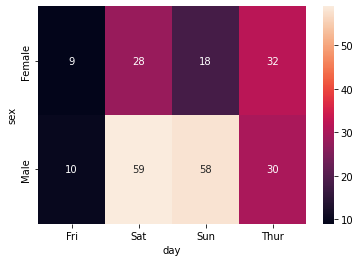

In [63]:
sns.heatmap(ctab2, annot=True)

In [65]:
list(range(2, 15, 3))

[2, 5, 8, 11, 14]

In [66]:
list(range(0.1, 10, 0.3))

TypeError: 'float' object cannot be interpreted as an integer

In [67]:
import numpy as np
alphas = np.arange(0.1, 100, 0.1)
alphas

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
       11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
       12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
       13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
       14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15